# Malaria Detection Project

by Stuart Miller

Data was downloaded from [Kaggle](https://www.kaggle.com/iarunava/cell-images-for-detecting-malaria).

**Goal**: create a model that could be used to help humans identify cells infected with malaria.

## Import needed libraries

In [36]:
try:
    import glob
    import numpy as np
    import pandas as pd
    import matplotlib.pyplot as plt
    from sklearn.model_selection import train_test_split

    from PIL import Image
    %matplotlib inline

    import keras
    from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
    from keras.models import Sequential
except:
    print("Unable to import all needed libraries")

Using TensorFlow backend.


## Load Data

1. Get locations of downloaded data
2. Show a sample of each type of image
3. Read in data to list
    * images as np.arrays
    * labels as 0 - infected, 1 - uninfected

In [2]:
MAIN_DATA_PATH = '~/SDD1/data/cell_images/*'

# get image paths
uninfected_img = glob.glob(MAIN_DATA_PATH + 'Uninfected/*')
infected_img = glob.glob(MAIN_DATA_PATH + 'Parasitized/*')

NameError: name 'Image' is not defined

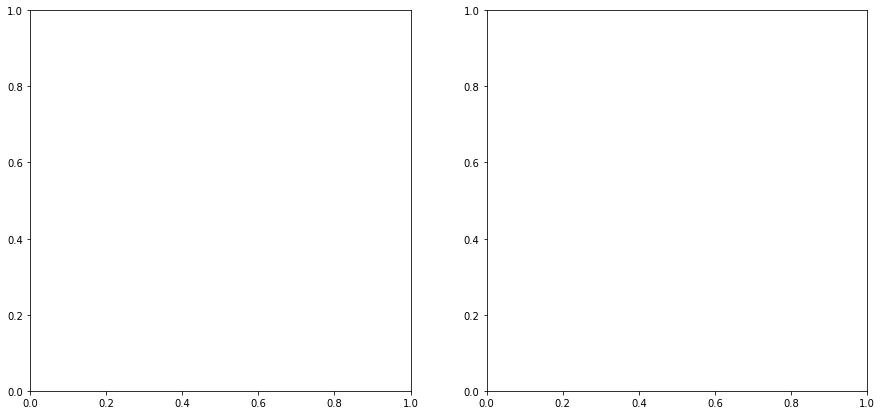

In [3]:
# visualize some sample images

fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize=(15, 7));

uninfected_image = Image.open(uninfected_img[5])
ax[0].imshow(uninfected_image);
ax[0].set_title('Sample Uninfected Image');
infected_image = Image.open(infected_img[5])
ax[1].imshow(infected_image);
ax[1].set_title('Sample Infected Image');

In [ ]:
IM_SIZE = 128
images = list()
labels = list()

# read in the infected images
# label as 0
for im in infected_img:
    try:
        image = Image.open(im)
        image = image.resize((IM_SIZE,IM_SIZE))
        images.append(np.array(image))
        labels.append(0)
    except:
        print("could not open " + im)
        
# read in the uninfected images
# label as 1
for im in uninfected_img:
    try:
        image = Image.open(im)
        image = image.resize((IM_SIZE,IM_SIZE))
        images.append(np.array(image))
        labels.append(1)
    except:
        print("Could not open " + im)